# Cnn on Mnist DataSet 

In [22]:
import os

ROOT = '/content/drive/MyDrive/Google Collab Files/Mnist'
os.chdir(ROOT)
assert ROOT == os.getcwd()

In [23]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
print(f'The Shape of X_train is: {X_train.shape}, \nThe Shape of Y_train is: {y_train.shape}')

The Shape of X_train is: (60000, 28, 28), 
The Shape of Y_train is: (60000,)


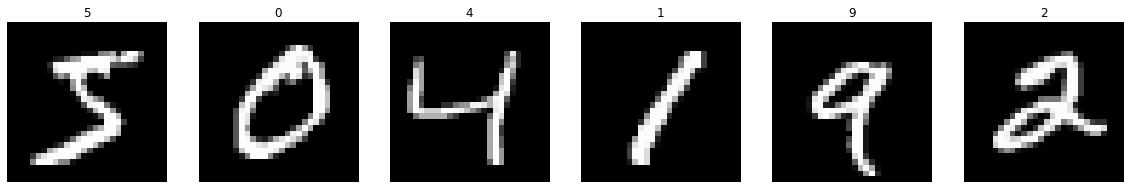

In [26]:
#Ploting First training image
fig = plt.figure(figsize=(20, 20))
for i in range(6):
  ax = fig.add_subplot(1, 6, i+1)
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(y_train[i])
  ax.set_axis_off()

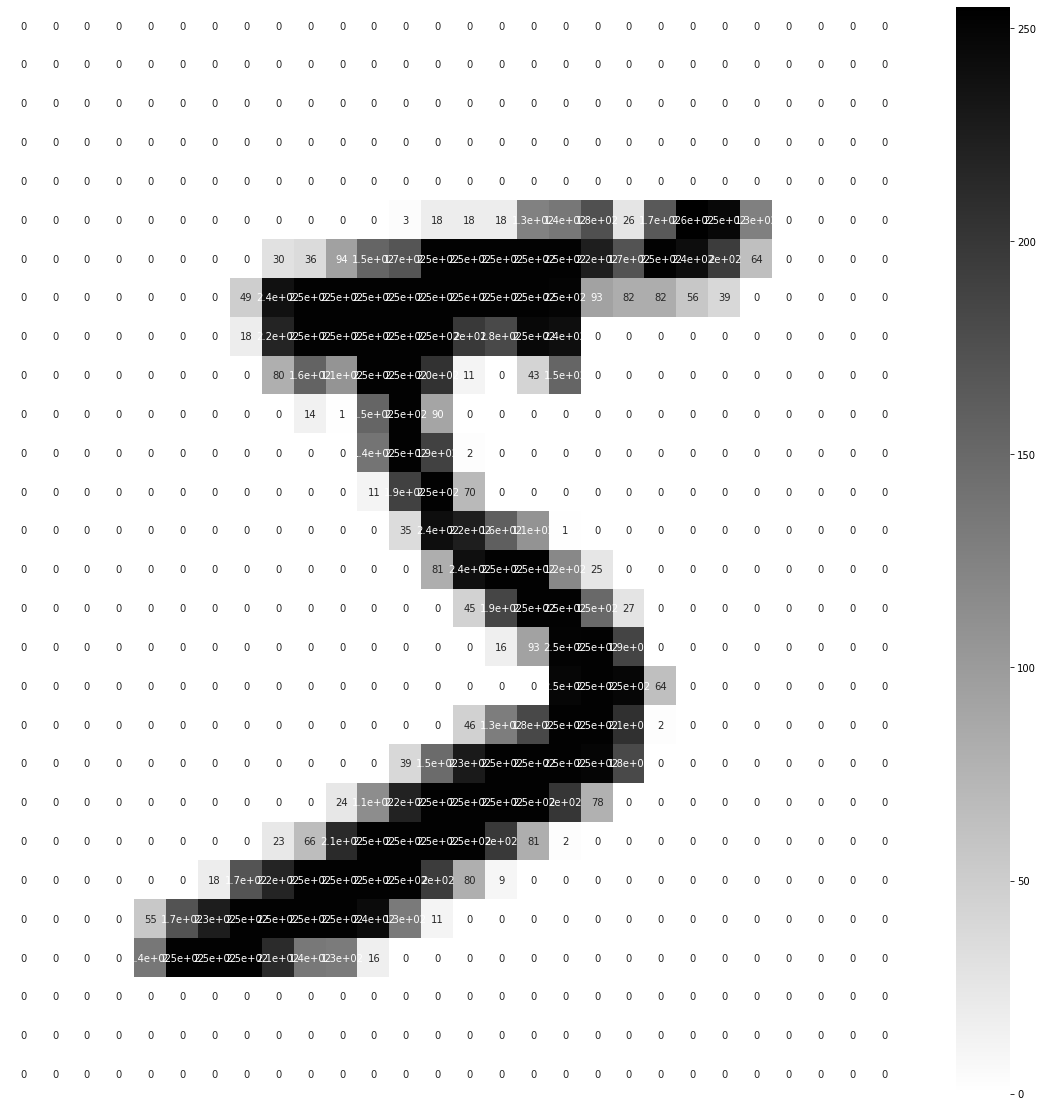

In [7]:
#visualise the image in more detail
plt.figure(figsize=(20, 20))
plt.axis('off')
sns.heatmap(X_train[0], cmap='binary', annot=True)

In [27]:
#scaling the data between 0 to 1 by dividing it by 255 as its a a unsigned integer 2^8
#scaling the data between 0 to 1 by dividing it by 255 as its a a unsigned integer 2^8
X_valid, X_train = X_train[:5000] / 255, X_train[5000:] / 255

y_valid, y_train = y_train[:5000], y_train[5000:]

X_test = X_test / 255

In [28]:
#Reshaping the training set to fil cnn & input size
img_rows, img_cols = 28, 28 #input image size

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)

X_valid.shape

(5000, 28, 28, 1)

In [29]:
from keras.utils import np_utils

num_classes = 10 
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_valid = np_utils.to_categorical(y_valid, num_classes)

# print first ten (one-hot) training labels
#print('One-hot labels:')
#print(y_train[:10])

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

Integer-valued labels:
[7 3 4 6 1 8 1 0 9 8]
(55000, 10)
(10000, 10)
(5000, 10)


Model Architecture 

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

model = Sequential()

#conv_1 convo layer with relu activation and depth = 32 kernals
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

#pool_1 down sizing to choose best params
model.add(MaxPooling2D(pool_size=(2, 2)))

#convo_2 convo layer with relu activation and depth = 64 kernals
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))

#pool_2 down sizing 
model.add(MaxPooling2D(pool_size=(2, 2)))

#convo_3 convo layer with relu activation and depth = 124 kernals
model.add(Conv2D(filters=124, kernel_size=(3, 3), activation='relu', padding='same'))

#pool_3 down sizing 
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 124)         71548     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 124)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1116)             

Compile the model

In [31]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(55000, 28, 28, 1)
(55000, 10)
(5000, 28, 28, 1)
(5000, 10)


Train the model

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_valid, y_valid), callbacks=[checkpointer], verbose=True, shuffle=True)

Epoch 1/20
860/860 [==============================] - 36s 6ms/step - loss: 0.1790 - accuracy: 0.9447 - val_loss: 0.0438 - val_accuracy: 0.9874

Epoch 00001: val_loss improved from inf to 0.04377, saving model to model.weights.best.hdf5
Epoch 2/20
860/860 [==============================] - 4s 5ms/step - loss: 0.0428 - accuracy: 0.9865 - val_loss: 0.0399 - val_accuracy: 0.9888

Epoch 00002: val_loss improved from 0.04377 to 0.03992, saving model to model.weights.best.hdf5
Epoch 3/20
860/860 [==============================] - 4s 5ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0371 - val_accuracy: 0.9888

Epoch 00003: val_loss improved from 0.03992 to 0.03705, saving model to model.weights.best.hdf5
Epoch 4/20
860/860 [==============================] - 5s 5ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0306 - val_accuracy: 0.9908

Epoch 00004: val_loss improved from 0.03705 to 0.03063, saving model to model.weights.best.hdf5
Epoch 5/20
860/860 [===========================

Calculate accuracy on the Test Set 

In [34]:
model.load_weights('model.weights.best.hdf5')
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = score[1] * 100

# print test accuracy
print(f'Test accuracy: %.4f%% : {accuracy}')

Test accuracy: %.4f%% : 98.9799976348877
